# Unweight and augment samples

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.sampling import SampleAugmenter
from madminer.sampling import multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas


In [2]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [4]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma_sys/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Load data (with tight cuts)

In [5]:
sa = SampleAugmenter(sample_dir + 'samples_tight.h5')

11:56 madminer.sampling    INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples_tight.h5
11:56 madminer.sampling    INFO    Found 2 parameters
11:56 madminer.sampling    INFO    Found 55 nuisance parameters
11:56 madminer.sampling    INFO    Found 103 benchmarks, of which 6 physical
11:56 madminer.sampling    INFO    Found 33 observables
11:56 madminer.sampling    INFO    Found 1136213 events
11:56 madminer.sampling    INFO    Found morphing setup with 6 components
11:56 madminer.sampling    INFO    Found nuisance morphing setup


### SALLY training data

In [6]:
for i in range(10):
    _, _, t_xz = sa.extract_samples_train_local(
        theta=constant_morphing_theta([0.,0.]),
        n_samples=1000000,
        folder=sample_dir + 'train_local_tight',
        filename='train_' + str(i),
        nuisance_score=True
    )

22:24 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
22:24 madminer.sampling    INFO    Effective number of samples: 55870.7417859401
22:24 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
22:25 madminer.sampling    INFO    Effective number of samples: 55870.7417859401
22:25 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
22:25 madminer.sampling    INFO    Effective number of samples: 55870.7417859401
22:25 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
22:25 madminer.sampling    INFO    Effective number of samples: 55870.7417859401
22:25 madminer.sampling    INFO    E

### RASCAL training data

In [ ]:
for i in range(1):
    _ = sa.extract_samples_train_ratio(
        theta0=random_morphing_thetas(1000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        theta1=constant_morphing_theta([0.,0.]),
        n_samples=100000,
        folder=sample_dir + 'train_ratio_tight',
        filename='train_' + str(i)
    )

### SCANDAL training data

In [ ]:
for i in range(1):
    sa.extract_samples_train_global(
        theta=random_morphing_thetas(10000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        n_samples=100000,
        folder=sample_dir + 'train_scandal_tight',
        filename='train_' + str(i)
    )

### Test data

In [7]:
x_sm, _ = sa.extract_samples_test(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=100000,
    folder=sample_dir + 'test_tight',
    filename='test'
)

22:26 madminer.sampling    INFO    Extracting evaluation sample. Sampling according to ('theta', array([0., 0.]))
22:26 madminer.sampling    INFO    Effective number of samples: 56108.067887619654


### xsec test

In [6]:
thetas_benchmarks, xsecs_benchmarks, xsec_errors_benchmarks = sa.extract_cross_sections(
    theta=multiple_benchmark_thetas(['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5'])
)

thetas_morphing, xsecs_morphing, xsec_errors_morphing = sa.extract_cross_sections(
    theta=random_morphing_thetas(1000, [('gaussian', 0., 0.02), ('gaussian', 0., 0.02)])
)

11:56 madminer.sampling    INFO    Starting cross-section calculation
11:56 madminer.sampling    INFO    Starting cross-section calculation


In [8]:
xsecs_benchmarks

array([0.001436  , 0.01798388, 0.01860013, 0.03424785, 0.02864592,
       0.01513785])

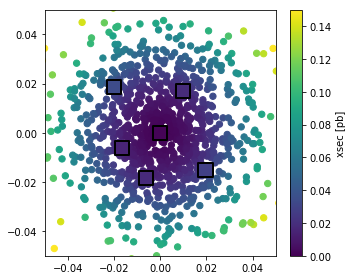

In [7]:
cmin, cmax = 0., 0.15

fig = plt.figure(figsize=(5,4))

sc = plt.scatter(thetas_morphing[:,0], thetas_morphing[:,1], c=xsecs_morphing,
            s=40., cmap='viridis', vmin=cmin, vmax=cmax,
            marker='o')

plt.scatter(thetas_benchmarks[:,0], thetas_benchmarks[:,1], c=xsecs_benchmarks,
            s=200., cmap='viridis', vmin=cmin, vmax=cmax,lw=2., edgecolor='black',
            marker='s')

cb = plt.colorbar(sc)
cb.set_label('xsec [pb]')

plt.xlim(-0.05,.05)
plt.ylim(-0.05,.05)
plt.tight_layout()
plt.show()

## Same without cuts

In [5]:
sa_all = SampleAugmenter(sample_dir + 'samples.h5', debug=False)

15:16 madminer.sampling    INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples.h5
15:16 madminer.sampling    INFO    Found 2 parameters
15:16 madminer.sampling    INFO    Found 55 nuisance parameters
15:16 madminer.sampling    INFO    Found 103 benchmarks, of which 6 physical
15:16 madminer.sampling    INFO    Found 33 observables
15:16 madminer.sampling    INFO    Found 1764309 events
15:16 madminer.sampling    INFO    Found morphing setup with 6 components
15:16 madminer.sampling    INFO    Found nuisance morphing setup


### SALLY training data

In [6]:
for i in range(10):
    _, _, _ = sa_all.extract_samples_train_local(
        theta=constant_morphing_theta([0.,0.]),
        n_samples=1000000,
        folder=sample_dir + 'train_local',
        filename='train_' + str(i),
        nuisance_score=True
    )

15:16 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
15:16 madminer.sampling    INFO    Effective number of samples: 19623.743605552474
15:16 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
15:16 madminer.sampling    INFO    Effective number of samples: 19623.743605552474
15:16 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
15:16 madminer.sampling    INFO    Effective number of samples: 19623.743605552474
15:16 madminer.sampling    INFO    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
15:16 madminer.sampling    INFO    Effective number of samples: 19623.743605552474
15:16 madminer.sampling    I

### RASCAL training data

In [ ]:
for i in range(10):
    _ = sa_all.extract_samples_train_ratio(
        theta0=random_morphing_thetas(1000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        theta1=constant_morphing_theta([0.,0.]),
        n_samples=100000,
        folder=sample_dir + 'train_ratio',
        filename='train_' + str(i)
    )

### SCANDAL training data

In [ ]:
for i in range(1):
    _, _, _ = sa_all.extract_samples_train_global(
        theta=random_morphing_thetas(10000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        n_samples=100000,
        folder=sample_dir + 'train_scandal',
        filename='train_' + str(i)
    )

### Validation and test data

In [10]:
_, _ = sa_all.extract_samples_test(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=100000,
    folder=sample_dir + 'test',
    filename='test'
)

22:26 madminer.sampling    INFO    Extracting evaluation sample. Sampling according to ('theta', array([0., 0.]))
22:26 madminer.sampling    INFO    Effective number of samples: 19453.29479344879
